<a href="https://colab.research.google.com/github/Azizahdahlan/Project-Data-Analysis-with-Python/blob/main/indonesian_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Cell 1: imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
# Cell 2: load
df = pd.read_csv("/content/indonesia_top125.csv")
df.head()

,title,year,imdb_rating,director,stars,penonton,bechdel_score,desc,gender_director,women_billing_score,log_penonton,age
0,Jumbo,2025,8.1,Ryan Adriandhy,"Prince Poetiray, Quinn Salman, Yusuf Ozkan",10233002.0,3,Meri & Mae; saling berbicara; Pentas dan Cari ...,Male,1,16.141129,0
1,KKN di Desa Penari,2022,5.9,Awi Suryadi,"Tisa Biani Azzahra, Adinda Thomas, Achmad Mega...",10061033.0,3,"Nur, Ayu, Widya; saling berbicara; selain laki...",Male,2,16.124181,3
2,Agak Laen,2024,7.6,Muhdkly Acho,"Bene Dion Rajagukguk, Oki Rengga, Indra Jegel",9126607.0,1,Marlina & Intan; tidak saling berbicara,Male,0,16.026705,1
3,Warkop DKI Reborn: Jangkrik Boss! Part 1,2016,6.4,Anggy Umbara,"Abimana Aryasatya, Vino G. Bastian, Tora Sudiro",6858616.0,1,"Sophia, Nikki; tidak saling berbicara",Male,0,15.741016,9
4,Pengabdi Setan 2: Communion,2022,6.7,Joko Anwar,"Tara Basro, Endy Arfian, Nasar Annuz",6391982.0,3,"Rini, Tari; saling berbicara; selain laki-laki",Male,1,15.670555,3


In [61]:
# Cell 3: cleaning
# remove non-digits from penonton (if any), convert
df['penonton'] = df['penonton'].astype(str).str.replace(r'[^0-9]', '', regex=True).replace('', np.nan).astype(float)
df['log_penonton'] = np.log1p(df['penonton'])
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')
df['bechdel_score'] = df['bechdel_score'].astype('Int64')
df['women_billing_score'] = pd.to_numeric(df['women_billing_score'], errors='coerce')
df['gender_director'] = df['gender_director'].map({0:'Male',1:'Female'})
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['age'] = 2025 - df['year']

df.to_csv("/content/indonesia_top125.csv", index=False)


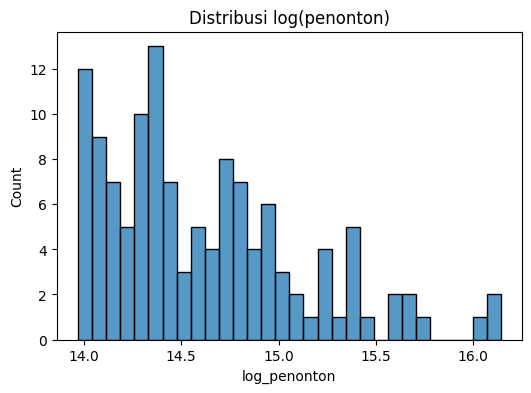

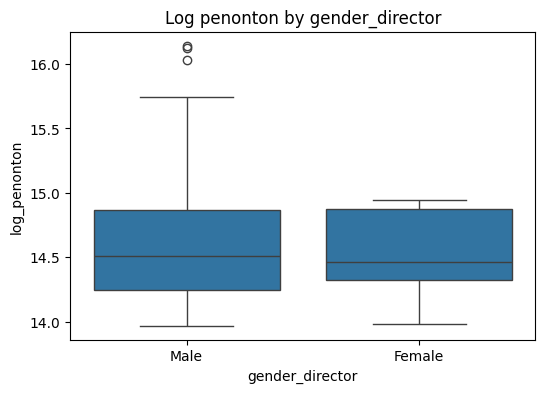

In [63]:
# Cell 4: EDA plots

plt.figure(figsize=(6,4))
sns.histplot(df['log_penonton'].dropna(), bins=30)
plt.title('Distribusi log(penonton)')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='gender_director', y='log_penonton', data=df)
plt.title('Log penonton by gender_director')
plt.show()

In [64]:
from scipy.stats import shapiro

stat, p = shapiro(df['log_penonton'])
print('Shapiro-Wilk Test: stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Data log_penonton terdistribusi normal")
else:
    print("Data log_penonton tidak terdistribusi normal")


Shapiro-Wilk Test: stat=0.920, p=0.000
Data log_penonton tidak terdistribusi normal


In [65]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(male, female)
print(f'Mann-Whitney U: U={u_stat:.3f}, p={p_val:.3f}')


Mann-Whitney U: U=601.000, p=0.816


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('log_penonton ~ C(bechdel_score)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                     sum_sq     df         F    PR(>F)
C(bechdel_score)   0.357026    3.0  0.464735  0.707426
Residual          30.985508  121.0       NaN       NaN


In [67]:
model2 = ols('log_penonton ~ C(gender_director) * C(bechdel_score)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)


                                         sum_sq     df            F  \
C(gender_director)                   902.735035    1.0  3506.784196   
C(bechdel_score)                     586.088877    3.0   758.911210   
C(gender_director):C(bechdel_score)  313.488994    3.0   405.928726   
Residual                              30.891038  120.0          NaN   

                                           PR(>F)  
C(gender_director)                   1.117381e-90  
C(bechdel_score)                     1.016097e-53  
C(gender_director):C(bechdel_score)  1.235507e-62  
Residual                                      NaN  


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [68]:
# Cell 5: Spearman correlation
corr_vars = ['imdb_rating','log_penonton','women_billing_score','age']
spearman = df[corr_vars].corr(method='spearman')
print(spearman)

                     imdb_rating  log_penonton  women_billing_score       age
imdb_rating             1.000000      0.139758            -0.209604  0.088334
log_penonton            0.139758      1.000000             0.139903 -0.140890
women_billing_score    -0.209604      0.139903             1.000000 -0.193480
age                     0.088334     -0.140890            -0.193480  1.000000


In [69]:
# Cell 6: Bivariate tests
male = df[df['gender_director']=='Male']['log_penonton'].dropna()
female = df[df['gender_director']=='Female']['log_penonton'].dropna()
stats.mannwhitneyu(male, female, alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(601.0), pvalue=np.float64(0.8164923845819834))

In [70]:
# Cell 7: OLS model (robust)
formula = 'log_penonton ~ imdb_rating + bechdel_score + women_billing_score + C(gender_director) + age'
ols = smf.ols(formula, data=df).fit(cov_type='HC3')
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           log_penonton   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.196
Date:                Thu, 30 Oct 2025   Prob (F-statistic):             0.0592
Time:                        03:55:36   Log-Likelihood:                -85.202
No. Observations:                 125   AIC:                             182.4
Df Residuals:                     119   BIC:                             199.4
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [71]:
# Cell 8: Count model (Negative Binomial) if prefer raw penonton
import statsmodels.api as sm
nb = sm.GLM(df['penonton'].dropna(), sm.add_constant(df[['imdb_rating','bechdel_score','women_billing_score','age']].loc[df['penonton'].notna()]), family=sm.families.NegativeBinomial())
nb_res = nb.fit()
print(nb_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               penonton   No. Observations:                  125
Model:                            GLM   Df Residuals:                      120
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1968.4
Date:                Thu, 30 Oct 2025   Deviance:                       32.696
Time:                        03:55:44   Pearson chi2:                     43.7
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02864
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.0188    

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [72]:
# Cell 9: Ordinal regression (statsmodels OrderedModel)
from statsmodels.miscmodels.ordinal_model import OrderedModel
ord_df = df.dropna(subset=['bechdel_score','women_billing_score','imdb_rating'])
exog = ord_df[['women_billing_score','imdb_rating']]
ord_mod = OrderedModel(ord_df['bechdel_score'], exog, distr='logit')
ord_res = ord_mod.fit(method='bfgs')
print(ord_res.summary())

Optimization terminated successfully.
         Current function value: 0.587877
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:          bechdel_score   Log-Likelihood:                -73.485
Model:                   OrderedModel   AIC:                             157.0
Method:            Maximum Likelihood   BIC:                             171.1
Date:                Thu, 30 Oct 2025                                         
Time:                        03:55:48                                         
No. Observations:                 125                                         
Df Residuals:                     120                                         
Df Model:                           2                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

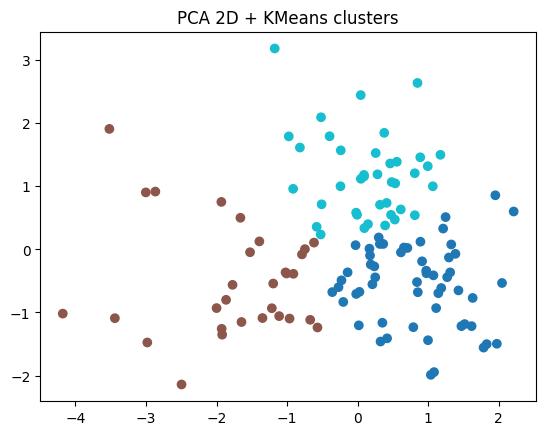

In [48]:
# Cell 10: PCA + KMeans
feat = df[['imdb_rating','log_penonton','women_billing_score','bechdel_score']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(feat)
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(pc)
plt.scatter(pc[:,0], pc[:,1], c=kmeans.labels_, cmap='tab10')
plt.title('PCA 2D + KMeans clusters')
plt.show()

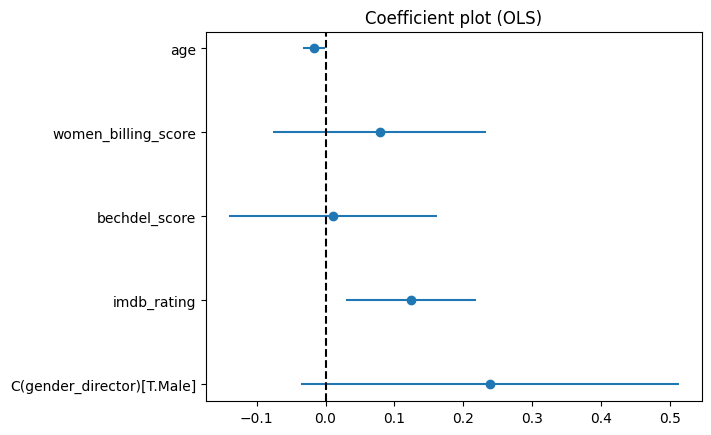

In [73]:
# Cell 11: Coef plot for OLS
coefs = ols.params.reset_index()
coefs.columns = ['term','estimate']
se = ols.bse
coefs['se'] = se.values
coefs = coefs[coefs['term']!='Intercept']
plt.errorbar(coefs['estimate'], coefs['term'], xerr=1.96*coefs['se'], fmt='o')
plt.axvline(0, color='k', linestyle='--')
plt.title('Coefficient plot (OLS)')
plt.show()

In [74]:
# Cell 12: Export results
coefs.to_csv('/content/coef_to_csv.csv', index=False)

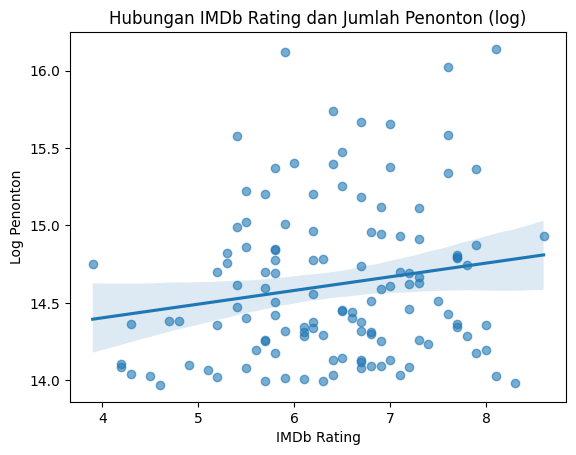

In [75]:
#Visualisasi
sns.regplot(x='imdb_rating', y='log_penonton', data=df, scatter_kws={'alpha':0.6})
plt.title('Hubungan IMDb Rating dan Jumlah Penonton (log)')
plt.xlabel('IMDb Rating')
plt.ylabel('Log Penonton')
plt.show()


/tmp/ipython-input-3103162412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender_director', y='log_penonton', data=df, palette='pastel')


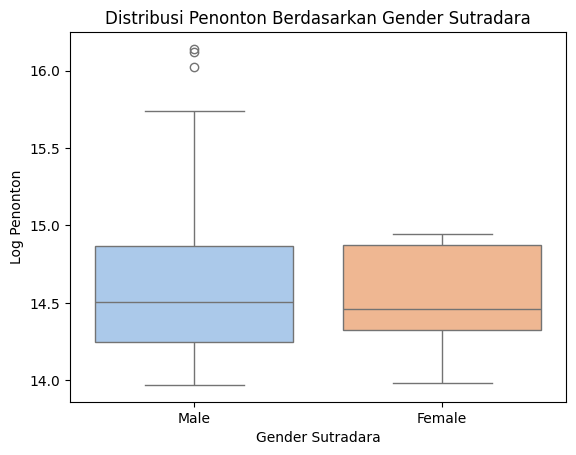

In [76]:
#Visualisasi 2
sns.boxplot(x='gender_director', y='log_penonton', data=df, palette='pastel')
plt.title('Distribusi Penonton Berdasarkan Gender Sutradara')
plt.xlabel('Gender Sutradara')
plt.ylabel('Log Penonton')
plt.show()


/tmp/ipython-input-3762085850.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='women_billing_score', y='penonton', data=df, ci=None, palette='coolwarm')
/tmp/ipython-input-3762085850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='women_billing_score', y='penonton', data=df, ci=None, palette='coolwarm')


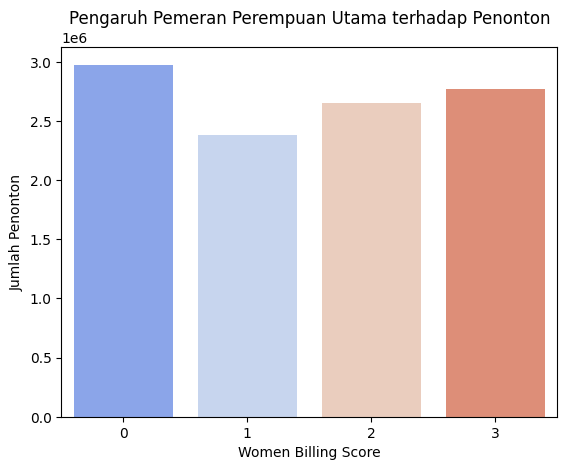

In [82]:
#Visualisasi 3
sns.barplot(x='women_billing_score', y='penonton', data=df, ci=None, palette='coolwarm')
plt.title('Pengaruh Pemeran Perempuan Utama terhadap Penonton')
plt.xlabel('Women Billing Score')
plt.ylabel('Jumlah Penonton')
plt.show()


/tmp/ipython-input-926035164.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bechdel_score', y='penonton', data=df, ci=None, palette='coolwarm')
/tmp/ipython-input-926035164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bechdel_score', y='penonton', data=df, ci=None, palette='coolwarm')


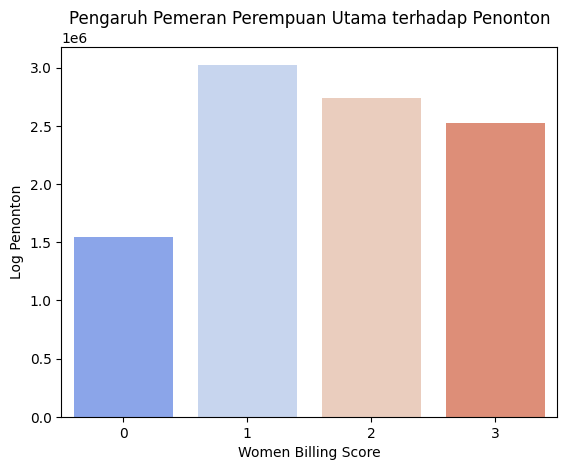

In [80]:

#Visualisasi 4
sns.barplot(x='bechdel_score', y='penonton', data=df, ci=None, palette='coolwarm')
plt.title('Pengaruh Pemeran Perempuan Utama terhadap Penonton')
plt.xlabel('Women Billing Score')
plt.ylabel('Log Penonton')
plt.show()

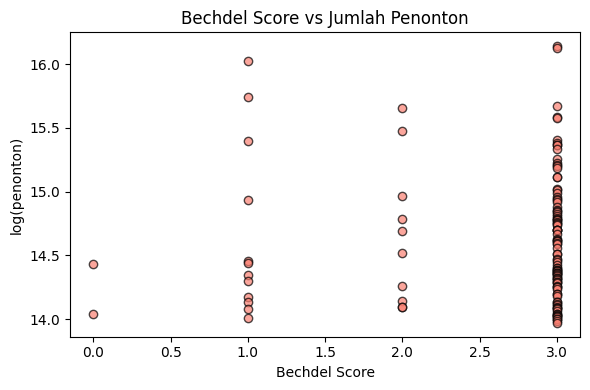

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(df['bechdel_score'], df['log_penonton'], alpha=0.7, color='salmon', edgecolor='k')
plt.title('Bechdel Score vs Jumlah Penonton')
plt.xlabel('Bechdel Score')
plt.ylabel('log(penonton)')
plt.tight_layout()
plt.savefig('bechdel_vs_viewers.png', dpi=300)
plt.show()
